In [89]:
import numpy as np

# generate random data
np.random.seed(42) 
X = np.random.rand(5500, 10)  # 500 samples, 5 features you can change the number of features and samples as you like
coefficients = np.array([2.5, -1.3, 0.7, 3.8, -2.1,2.5, -1.3, 0.7, 3.8, -2.1])  # true coefficients of the model change as you like
y = X @ coefficients + np.random.randn(5500) * 0.5  # Add some noise

# split into training and testing sets 
train_size = int(0.8 * len(y))
Xtrain, Xtest = X[:train_size], X[train_size:]
yTrain, yTest = y[:train_size], y[train_size:]


# Linear regression Model
class LinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.intercept = self.coefficients[0]
        self.coefficients = self.coefficients[1:]

    def predict(self, X):
        return X.dot(self.coefficients) + self.intercept
# Ridge Regression Model
class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        I = np.eye(X.shape[1])
        I[0, 0] = 0  # we don't regularize the intercept
        self.coefficients = np.linalg.inv(X.T.dot(X) + self.alpha * I).dot(X.T).dot(y)
        self.intercept = self.coefficients[0]
        self.coefficients = self.coefficients[1:]

    def predict(self, X):
        return X.dot(self.coefficients) + self.intercept



In [90]:
'''
X => should be a numpy array of shape (n_samples, n_features) 
y => should be a numpy array of shape (n_samples,).
model => should be an instance of a class that has fit and predict methods, such as LinearRegression or RidgeRegression.
seed => is an integer that sets the random seed for reproducibility.
'''

def kFoldCv(X, y, model, k=5, seed=1):
    np.random.seed(seed)
    # shuffling the data indices
    indices = np.arange(len(y))
    np.random.shuffle(indices)  
    folds = np.array_split(indices, k)
    
    mseScores = []
    # it will loop through the folds
    for i in range(k):
        # split the data into training and validation sets
        valIndices = folds[i]
        trainIndices = np.hstack([folds[j] for j in range(k) if j != i])
        Xtrain, yTrain = X[trainIndices], y[trainIndices]
        Xval, yVal = X[valIndices], y[valIndices]
        # fit the regression model on the training data
        model.fit(Xtrain, yTrain)
        # predict on the validation set and calculate the MSE
        yPred = model.predict(Xval)
        mse = np.mean((yVal - yPred) ** 2)
        mseScores.append(mse)
    return mseScores, np.mean(mseScores)

# perform K-fold cross-validation
cv_scores, avg_cv_score = kFoldCv(Xtrain, yTrain, model=LinearRegression(), k=5, seed=1)
print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Average MSE: {avg_cv_score}")


Cross-Validation MSE Scores: [0.24731074355431615, 0.24752836260831246, 0.24481450529227203, 0.24013742706117508, 0.2325568319983055]
Average MSE: 0.24246957410287626


In [91]:
'''
X => should be a numpy array of shape (n_samples, n_features)
y => should be a numpy array of shape (n_samples,).
model => should be an instance of a class that has fit and predict methods, such as LinearRegression or RidgeRegression.
numIterations => is an integer that sets the number of bootstrap iterations.
seed => is an integer that sets the random seed for reproducibility.
'''
# bootstrapping function
def bootstrap(X, y, model, numIterations=100, seed=1):
    np.random.seed(seed)
    n = len(y)
    mse_scores = []
    # loop through the number of iterations
    for _ in range(numIterations):
        # sample with replacement from the data
        indices = np.random.choice(np.arange(n), size=n, replace=True) 
        Xsample, ySample = X[indices], y[indices]
        # train the regression model on the sampled data
        model.fit(Xsample, ySample)
        yPred = model.predict(Xsample)
        mse = np.mean((ySample - yPred) ** 2)
        mse_scores.append(mse)
    
    return mse_scores, np.mean(mse_scores)

# perform bootstrapping
bootstrap_scores, avg_bootstrap_score = bootstrap(Xtrain, yTrain, model=LinearRegression(), numIterations=100, seed=1)
print(f"Bootstrapping MSE Scores: {bootstrap_scores[:5]} (showing first 5)")
print(f"Average MSE: {avg_bootstrap_score}")


Bootstrapping MSE Scores: [0.24076741491007278, 0.23159162671654032, 0.24750871435905714, 0.2506853089469749, 0.24118386552327975] (showing first 5)
Average MSE: 0.23972558425857263


In [92]:
def calculate_aic(X, y, model):
    n, p = X.shape
    # fit the model
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # calculate the residual sum of squares
    rss = np.sum((y - y_pred) ** 2)
    # calculate the AIC
    aic = n * np.log(rss / n) + 2 * p
    return aic

# add intercept to X_train
aic = calculate_aic(Xtrain, yTrain, model=LinearRegression())
print(f"AIC: {aic}")


AIC: -6249.928876908958


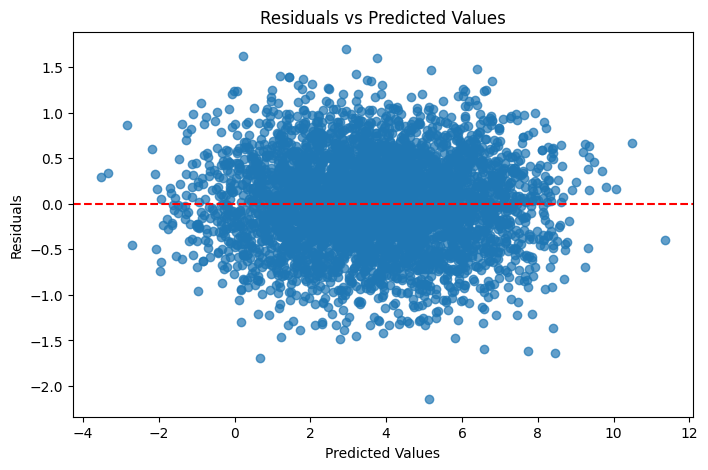

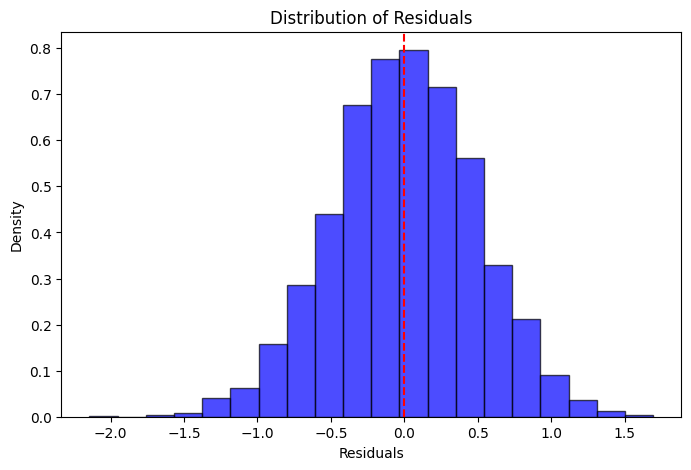

In [ ]:
import matplotlib.pyplot as plt

# compute the intercept explicitly if not already done
# mean of y and X for calculating intercept
y_mean = np.mean(yTrain)
X_mean = np.mean(Xtrain, axis=0)

# assuming 'coefficients' is a vector obtained earlier
intercept = y_mean - np.dot(X_mean, coefficients)

# generate predictions
yTrain_pred = np.dot(Xtrain, coefficients) + intercept  # add intercept here
residuals = yTrain - yTrain_pred

# residuals vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(yTrain_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# histogram/KDE of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density") 
plt.show()


In [94]:
#The points appear to be randomly scattered around the red dashed line at 𝑦 = 0 y=0, which is a good sign. This indicates no clear pattern, suggesting that the model is likely capturing the relationship between predictors and the target variable reasonably well.